In [1]:
%matplotlib inline

In [3]:
# Settings things up
from os.path import join

import matplotlib.pyplot as plt
import numpy as np

import IPython
inputPath = join('..', 'examples', 'files')

from praatio import dataio

# Some convenience functions -- we'll be using these a lot
def pitchForPlots(pitchFN):
    pitchTier = dataio.open2DPointObject(pitchFN)
    x, y = zip(*pitchTier.pointList)
    return x, y

def doPlot(axis, title, pitchFN):
    axis.plot(*pitchForPlots(pitchFN))
    axis.set_title(title)
    axis.set_xlabel("time(s)")
    axis.set_ylabel("F0(hz)")
    
def displayAudio(audioTuple):
    for title, wavFN in audioTuple:
        print(title)
        IPython.display.display(IPython.display.Audio(wavFN))

In [5]:
import io
import os
from os.path import join

from promo import f0_morph
from praatio import audioio
from praatio import dataio
from praatio import praat_scripts
from praatio import pitch_and_intensity

# We need to use absolute paths when using praatEXE
inputPath = os.path.abspath(join('..', 'examples', 'files'))
outputPath = os.path.abspath(join(inputPath, "test_output"))
if not os.path.exists(outputPath):
    os.mkdir(outputPath)

########
# STEP 1: Load all the pre-defined parameters

# Pick your poison
praatEXE = "/home/ideabay/Documents/vivek/Thesis/ProMo/praat"  # Windows paths
#praatEXE = "/Applications/Praat.app/Contents/MacOS/Praat"  # Mac paths

# Audio file to manipulate
inputFile = "/home/ideabay/Documents/vivek/Thesis/projects_selected/deep-voice-conversion/datasets/arctic/bdl/arctic_a0001.wav"

# Pitch file for manipulation
flatPitchFN = "bdl_flat_pitch.PitchTier"

# Final output wav file
outputWavFN = "bdl_flat_pitch.wav"
minPitch = 50
maxPitch = 350

########
# STEP 2: Create the target pitch contour
# To do this, we need to obtain pitch values at regular intervals
# Generally, you'd extract this information or use a stylized curve
# but here we'll generate an unnaturally flat pitch.  It will be noticably weird.
duration = audioio.getDuration(inputFile)
frequency = 100.0
pitchVal = 100.0
pitchList = [(timeV / frequency, pitchVal) for timeV in range(int(duration * 100))]

targetPitchTier = dataio.PointObject2D(pitchList, dataio.PITCH, 0, duration)
targetPitchTier.save(join(outputPath, flatPitchFN))

########
# STEP 3: Do the resynthesis

praat_scripts.resynthesizePitch(praatEXE,
                                inputFile,
                                join(outputPath, flatPitchFN),
                                join(outputPath, outputWavFN),
                                minPitch, maxPitch)
print("Let's take a look at the output:")

Let's take a look at the output:


In [6]:
displayAudio((("The original audio file:", inputFile),
              ("The new, resynthesized audio file (yikes!):", join(outputPath, outputWavFN))))

The original audio file:


The new, resynthesized audio file (yikes!):


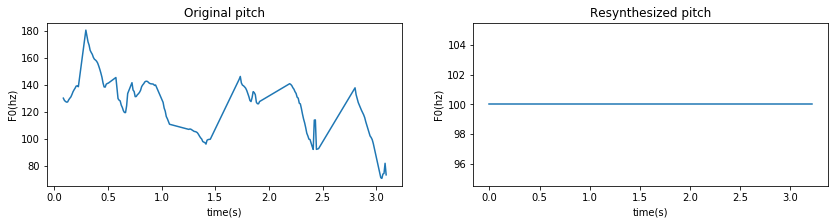

In [8]:
f, plotList = plt.subplots(1, 2, figsize=(14, 3))

x, y = zip(*targetPitchTier.pointList)

mary2PitchFN = "bdl.PitchTier"
pitch_and_intensity.extractPitchTier(inputFile,
                                     join(outputPath, mary2PitchFN),
                                     praatEXE, minPitch, maxPitch)

doPlot(plotList[0], 'Original pitch', join(outputPath, mary2PitchFN)) 
doPlot(plotList[1], 'Resynthesized pitch', join(outputPath, flatPitchFN))

In [10]:
# Skipping everything above 'STEP 1' from the previous example

########
# STEP 1: Load all the pre-defined parameters

# Pick your poison
praatEXE = "/home/ideabay/Documents/vivek/Thesis/ProMo/praat"  # Windows paths
#praatEXE = "/Applications/Praat.app/Contents/MacOS/Praat"  # Mac paths

# Audio file to manipulate
inputFile = "/home/ideabay/Documents/vivek/Thesis/projects_selected/deep-voice-conversion/datasets/arctic/bdl/arctic_a0001.wav"

# (*NEW*) Audio file supplying target pitch contour
targetFile = "/home/ideabay/Documents/vivek/Thesis/projects_selected/deep-voice-conversion/datasets/arctic/slt/arctic_a0001.wav"

# (*NEW*) Pitch file for manipulation
mary1PitchFN = "bdl.PitchTier"

# Final output wav file
outputWavFN = "bdl_to_slt.wav"
minPitch = 50
maxPitch = 350

########
# STEP 2: Create the target pitch contour
# (*NEW*) Extracting pitch from target file
pitch_and_intensity.extractPitchTier(targetFile,
                                     join(outputPath, mary1PitchFN),
                                     praatEXE, minPitch, maxPitch)

########
# STEP 3: Do the resynthesis

praat_scripts.resynthesizePitch(praatEXE,
                                inputFile,
                                join(outputPath, mary1PitchFN),
                                join(outputPath, outputWavFN),
                                minPitch, maxPitch)
print("Let's take a look at the output:")

Let's take a look at the output:


In [11]:
displayAudio((("The original audio file:", inputFile),
              ("The target audio file:", targetFile),
              ("The new, resynthesized audio file (still yikes!):", join(outputPath, outputWavFN))))

The original audio file:


The target audio file:


The new, resynthesized audio file (still yikes!):


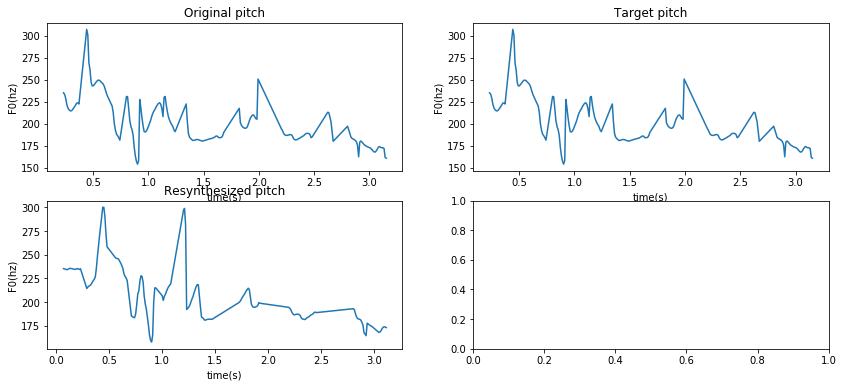

In [12]:
f, plotList = plt.subplots(2, 2, figsize=(14, 6))

resynthesizedPitchFN = "bdl_to_slt.TextGrid"
pitch_and_intensity.extractPitchTier(join(outputPath, outputWavFN),
                                     join(outputPath, resynthesizedPitchFN),
                                     praatEXE, minPitch, maxPitch)

doPlot(plotList[0][0], 'Original pitch', join(outputPath, mary2PitchFN)) 
doPlot(plotList[0][1], 'Target pitch', join(outputPath, mary1PitchFN)) 
doPlot(plotList[1][0], 'Resynthesized pitch', join(outputPath, resynthesizedPitchFN)) 

In [13]:
# Skipping everything above 'STEP 1' from the previous example

########
# STEP 1: Load all the pre-defined parameters

# Pick your poison
praatEXE = "/home/ideabay/Documents/vivek/Thesis/ProMo/praat"  # Windows paths
#praatEXE = "/Applications/Praat.app/Contents/MacOS/Praat"  # Mac paths

# Audio file to manipulate
inputFile = "/home/ideabay/Documents/vivek/Thesis/projects_selected/deep-voice-conversion/datasets/arctic/bdl/arctic_a0001.wav"

# (*NEW*) Audio file supplying target pitch contour
targetFile = "/home/ideabay/Documents/vivek/Thesis/projects_selected/deep-voice-conversion/datasets/arctic/slt/arctic_a0001.wav"

# Pitch file for manipulation
mary1PitchFN = "slt.PitchTier"
mary2PitchFN = "bdl.PitchTier"

# Final output wav file
outputWavFN = "bdl_to_slt_new.wav"
minPitch = 50
maxPitch = 350

# (*NEW*) The list of steps
# A lists of values between 0 and 1.0 where 0 corresponds to 0% morph (all source contour)
# and 1.0 corresponds to 100% morph (all target contour)
# For now, let's go with the simplest possible stepList:
stepList = [1.0, ]

########
# STEP 2: Load pitch data
# Notice that this time we're using extractPitch rather than extractPitchTier.
# The result is the same except the form of the output. extractPitch() returns
# a list of the form [(timeV1, pitchV1), (timeV2, pitchV2), ] whereas
# extractPitchTier() returns
fromPitchTier = pitch_and_intensity.extractPitchTier(inputFile,
                                                     join(outputPath, mary2PitchFN),
                                                     praatEXE, minPitch,
                                                     maxPitch, forceRegenerate=False)

toPitchTier = pitch_and_intensity.extractPitchTier(targetFile,
                                                   join(outputPath, mary1PitchFN),
                                                   praatEXE, minPitch,
                                                   maxPitch, forceRegenerate=False)

########
# STEP 3: Prepare the pitch regions
# (*NEW*) Wrap the pitch data into a list []
# extractPitch() returns a list of pitch data points
# f0 morph expects a list of lists, where each element of the list contains the pitch
# values for one region of the audio data. (e.g. the pitch values in fromPitch[0] would
# get morphed to the pitch values in toPitch[0] and the pitch values in fromPitch[1]
# would get morphed to the pitch values in toPitch[1], etc.)
# In this example, we only have 1 region containing all of our pitch data.  Thus:
fromPitchRegions = [fromPitchTier.pointList, ]
toPitchRegions = [toPitchTier.pointList, ]

########
# STEP 4: Run the morph process
f0_morph.f0Morph(fromWavFN=inputFile,
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="bdl_to_slt_new",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE)
print("Let's take a look at the output:")

Let's take a look at the output:


In [14]:
displayAudio((("The original audio file:", inputFile),
              ("The target audio file:", targetFile),
              ("The new, resynthesized audio file (better, but still yikes!):", join(outputPath, "f0_resynthesized_wavs", "bdl_to_slt_new_1.wav"))))

The original audio file:


The target audio file:


The new, resynthesized audio file (better, but still yikes!):


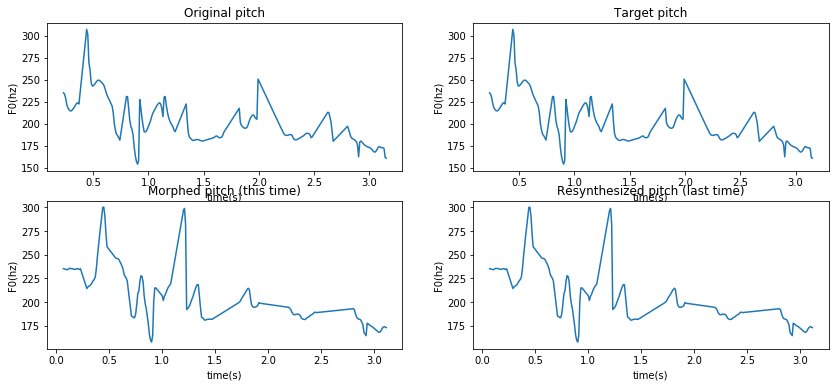

In [15]:
f, plotList = plt.subplots(2, 2, figsize=(14, 6))

pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "bdl_to_slt_new_1.wav"),
                                     join(outputPath, "bdl_to_slt_new.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=False)

doPlot(plotList[0][0], 'Original pitch', join(outputPath, mary2PitchFN)) 
doPlot(plotList[0][1], 'Target pitch', join(outputPath, mary1PitchFN)) 
doPlot(plotList[1][0], 'Morphed pitch (this time)', join(outputPath, "bdl_to_slt_new.PitchTier"))
doPlot(plotList[1][1], 'Resynthesized pitch (last time)', join(outputPath, resynthesizedPitchFN))

In [16]:
f0_morph.f0Morph(fromWavFN=inputFile,
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="bdl_to_slt_new_avg",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=False,  # (*NEW*)
                 keepAveragePitch=True)   # (*NEW*)

f0_morph.f0Morph(fromWavFN=inputFile,
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="bdl_to_slt_new_range",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=True,  # (*NEW*)
                 keepAveragePitch=False)   # (*NEW*)

f0_morph.f0Morph(fromWavFN=inputFile,
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="bdl_to_slt_new_all",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=True,  # (*NEW*)
                 keepAveragePitch=True)   # (*NEW*)

# And we'll go ahead and extract their pitchTiers now
pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "bdl_to_slt_new_avg_1.wav"),
                                     join(outputPath, "bdl_to_slt_new_avg_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)
pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "bdl_to_slt_new_range_1.wav"),
                                     join(outputPath, "bdl_to_slt_new_range_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)
pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "bdl_to_slt_new_all_1.wav"),
                                     join(outputPath, "bdl_to_slt_new_all_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)
print("Let's take a look at the output:")

Let's take a look at the output:


In [17]:
displayAudio((
              ("The original audio file:", inputFile),
              ("The target audio file:", targetFile),
              ("The morphed audio from last time:", join(outputPath, "f0_resynthesized_wavs", "bdl_to_slt_new_1.wav")),
              ("With source average pitch:", join(outputPath, "f0_resynthesized_wavs", "bdl_to_slt_new_avg_1.wav")),
              ("With source range:", join(outputPath, "f0_resynthesized_wavs", "bdl_to_slt_new_range_1.wav")),
              ("With both source average pitch and range:", join(outputPath, "f0_resynthesized_wavs", "bdl_to_slt_new_all_1.wav")),
              ))

The original audio file:


The target audio file:


The morphed audio from last time:


With source average pitch:


With source range:


With both source average pitch and range:


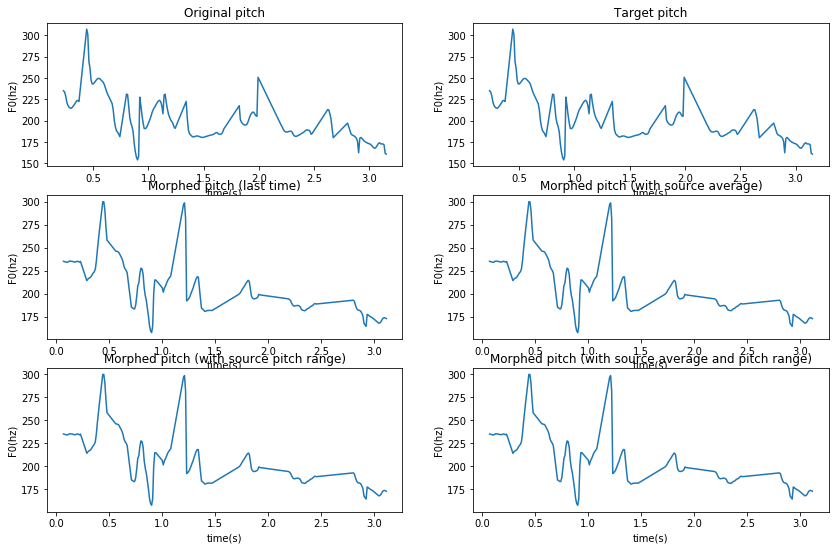

In [18]:
f, plotList = plt.subplots(3, 2, figsize=(14, 9))

doPlot(plotList[0][0], 'Original pitch', join(outputPath, mary2PitchFN)) 
doPlot(plotList[0][1], 'Target pitch', join(outputPath, mary1PitchFN)) 
doPlot(plotList[1][0], 'Morphed pitch (last time)', join(outputPath, "bdl_to_slt_new.PitchTier"))
doPlot(plotList[1][1], 'Morphed pitch (with source average)', join(outputPath, "bdl_to_slt_new_avg_1.PitchTier"))
doPlot(plotList[2][0], 'Morphed pitch (with source pitch range)', join(outputPath, "bdl_to_slt_new_range_1.PitchTier"))
doPlot(plotList[2][1], 'Morphed pitch (with source average and pitch range)', join(outputPath, "bdl_to_slt_new_all_1.PitchTier"))

In [19]:
fromPitchRegions = [fromPitchTier.pointList, ]
toPitchRegions = [toPitchTier.pointList, ]

In [20]:
halfLen = int(len(fromPitchRegions)/2)
fromPitchRegions = [fromPitchTier.pointList[:halfLen], fromPitchTier.pointList[halfLen:]]
                    
halfLen = int(len(toPitchRegions)/2)                    
toPitchRegions = [toPitchTier.pointList[:halfLen], toPitchTier.pointList[halfLen:]]

In [21]:
# This is a complete example that don't require the earlier
# segments of this tutorial to run.
import io
import os
from os.path import join

from promo import f0_morph
from praatio import audioio
from praatio import dataio
from praatio import praat_scripts
from praatio import pitch_and_intensity

# We need to use absolute paths when using praatEXE
inputPath = os.path.abspath(join('..', 'examples', 'files'))
outputPath = os.path.abspath(join(inputPath, "test_output"))
if not os.path.exists(outputPath):
    os.mkdir(outputPath)

########
# STEP 1: Load all the pre-defined parameters

# Pick your poison
praatEXE = "/home/ideabay/Documents/vivek/Thesis/ProMo/praat"  # Windows paths
#praatEXE = "/Applications/Praat.app/Contents/MacOS/Praat"  # Mac paths
minPitch = 50
maxPitch = 350
stepList = [1.0, ]

########
# STEP 2: Load pitch data
fromPitchTier = pitch_and_intensity.extractPitchTier(inputFile,
                                                     join(outputPath, "source.PitchTier"),
                                                     praatEXE, minPitch,
                                                     maxPitch, forceRegenerate=True)

toPitchTier = pitch_and_intensity.extractPitchTier(targetFile,
                                                   join(outputPath, "target.PitchTier"),
                                                   praatEXE, minPitch,
                                                   maxPitch, forceRegenerate=True)

# ########
# # STEP 3: Prepare the pitch regions
# # (*NEW*) -- using getPitchForIntervals()
# tierName = "utterances"
# fromTGFN = join(inputPath, "oranges.TextGrid")
# toTGFN = join(inputPath, "pickles.TextGrid")
# fromPitchRegions = f0_morph.getPitchForIntervals(fromPitchTier.pointList, fromTGFN, tierName)
# toPitchRegions = f0_morph.getPitchForIntervals(toPitchTier.pointList, toTGFN, tierName)

# ########
# # STEP 4: Run the morph process
# f0_morph.f0Morph(fromWavFN=join(inputPath, "oranges.wav"),
#                  pitchPath=outputPath,
#                  stepList=stepList,
#                  outputName="oranges_to_pickles_with_textgrids",
#                  doPlotPitchSteps=False,
#                  fromPitchData=fromPitchRegions,
#                  toPitchData=toPitchRegions,
#                  outputMinPitch=minPitch,
#                  outputMaxPitch=maxPitch,
#                  praatEXE=praatEXE,
#                  keepPitchRange=False,
#                  keepAveragePitch=False,
#                  sourcePitchDataList=fromPitchTier.pointList)  
#                 # (*NEW*) If you aren't manipulating the whole pitch contour, specify the source
#                 # pitch contour with *sourcePitchDataList* and it will sample from any regions
#                 # not in fromPitchData
                

# # And we'll go ahead and extract the pitchTier now
# pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "oranges_to_pickles_with_textgrids_1.wav"),
#                                      join(outputPath, "oranges_to_pickles_with_textgrids_1.PitchTier"),
#                                      praatEXE, minPitch,
#                                      maxPitch, forceRegenerate=True)


# Let's also morph the files without a textgrid for comparison
fromPitchRegions = [fromPitchTier.pointList, ]
toPitchRegions = [toPitchTier.pointList, ]
f0_morph.f0Morph(inputFile,
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="source_to_target",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=False,
                 keepAveragePitch=False)

pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "source_to_target_1.wav"),
                                     join(outputPath, "source_to_target_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)

print("Let's take a look at the output:")

Let's take a look at the output:


In [22]:
displayAudio((
              ("The original audio file:", inputFile),
              ("The target audio file:", targetFile),
              ("Morphed without textgrids:", join(outputPath, "f0_resynthesized_wavs", "source_to_target_1.wav")),
              ))

The original audio file:


The target audio file:


Morphed without textgrids:


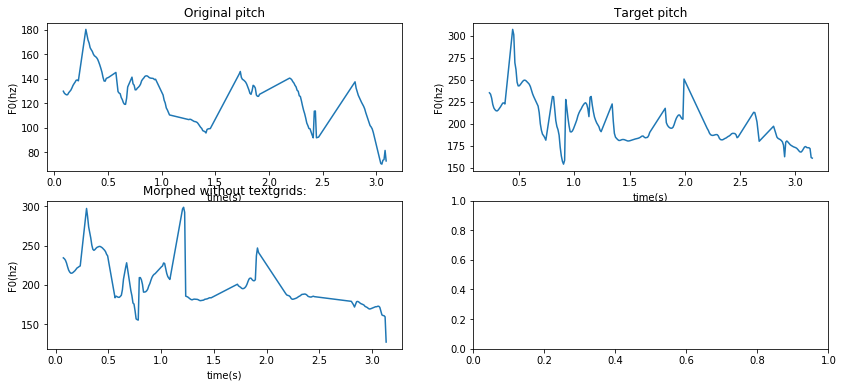

In [23]:
f, plotList = plt.subplots(2, 2, figsize=(14, 6))

doPlot(plotList[0][0], 'Original pitch', join(outputPath, "source.PitchTier")) 
doPlot(plotList[0][1], 'Target pitch', join(outputPath, "target.PitchTier")) 
doPlot(plotList[1][0], 'Morphed without textgrids:', join(outputPath, "source_to_target_1.PitchTier"))
#doPlot(plotList[1][1], 'Morphed with textgrids:', join(outputPath, "oranges_to_pickles_with_textgrids_1.PitchTier"))

In [24]:
stepList = [1.0, ]

In [25]:
### For creating textgrid files

In [26]:
import os
from praatio import tgio
from praatio import audioio

tgFN = os.path.splitext(targetFile)[0] + ".TextGrid"

duration = audioio.WavQueryObj(inputFile).getDuration()
tier = tgio.IntervalTier("words", [], 0, duration) # TierName, List of intervals, tier start time, tier end time

tg = tgio.Textgrid()
tg.addTier(tier)
tg.save(tgFN)

In [27]:
# We'll use the same setup as in the previous example, which used textgrids
stepList = [0.66, 1.0]
minPitch = 75
maxPitch = 350


fromPitchTier = pitch_and_intensity.extractPitchTier(inputFile,
                                                     join(outputPath, "source1.PitchTier"),
                                                     praatEXE, minPitch,
                                                     maxPitch, forceRegenerate=True)

toPitchTier = pitch_and_intensity.extractPitchTier(targetFile,
                                                   join(outputPath, "target1.PitchTier"),
                                                   praatEXE, minPitch,
                                                   maxPitch, forceRegenerate=True)


tierName = "words"
fromTGFN = join(inputPath, "source1.TextGrid")
toTGFN = join(inputPath, "target1.TextGrid")
fromPitchRegions = f0_morph.getPitchForIntervals(fromPitchTier.pointList, fromTGFN, tierName)
toPitchRegions = f0_morph.getPitchForIntervals(toPitchTier.pointList, toTGFN, tierName)

########
# STEP 4: Run the morph process
f0_morph.f0Morph(inputFile,
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="source1_to_target1_morph",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=False,
                 keepAveragePitch=False)

# # And we'll go ahead and extract the pitchTier now
# pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "source1_to_target1_morph_0.wav"),
#                                      join(outputPath, "source1_to_target1_morph_0.PitchTier"),
#                                      praatEXE, minPitch,
#                                      maxPitch, forceRegenerate=True)

# pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "source1_to_target1_morph_0.33.wav"),
#                                      join(outputPath, "source1_to_target1_morph_0.33.PitchTier"),
#                                      praatEXE, minPitch,
#                                      maxPitch, forceRegenerate=True)

pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "source1_to_target1_morph_0.66.wav"),
                                     join(outputPath, "source1_to_target1_morph_0.66.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)

pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "source1_to_target1_morph_1.wav"),
                                     join(outputPath, "source1_to_target1_morph_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)

print("Let's take a look at the output:")

MissingPitchDataException: 

No data points available in a region for morphing.
Two data points are needed in each region to do the morph
Regions with fewer than two samples are skipped, which should be fine for some cases (e.g. unvoiced segments).
If you need more data points, see promo.morph_utils.interpolation